In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Import data

In [13]:
con = sqlite3.connect("cultuurconnect.db")

In [14]:
holding = pd.read_sql("""SELECT w.work_id, COUNT(distinct library) holding_count
                        FROM holding h
                        JOIN works_frabl w ON h.frabl = w.frabl
                        GROUP BY work_id
                        """, con)

In [15]:
metadata = pd.read_sql("""SELECT type, w.work_id
                        FROM metadata m
                        JOIN works_frabl w ON m.frabl = w.frabl""", con)

In [16]:
metadata = metadata.drop_duplicates()

In [17]:
metadata = metadata.dropna()
metadata = pd.DataFrame(metadata.groupby("work_id").type.apply(";".join)).reset_index().copy()
metadata = metadata[~metadata.type.str.contains(";")].copy()

In [18]:
df = metadata.merge(holding, on="work_id", how="outer")
# drop na values
df = df.dropna().copy()

## Describe

In [19]:
df.groupby("type").holding_count.describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
Fiction,223.0,58.466368,70.547138,1.0,6.0,36.0,80.5,426.0
NonFiction,7619.0,14.689723,30.556221,1.0,2.0,4.0,12.0,362.0


## Visualize

In [20]:
sizefreq = df.groupby(["holding_count","type"]).count().reset_index().rename(columns={"work_id":"count"})

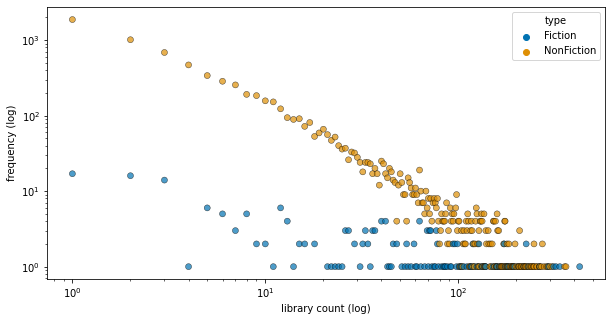

In [23]:
fig, ax = plt.subplots(figsize = (10,5))

sns.set_palette("colorblind")

sns.scatterplot(data=sizefreq, x="holding_count",y="count", hue="type", edgecolor="black", alpha=0.7, ax=ax)
ax.set(xscale="log", yscale="log")

ax.set_ylabel("frequency (log)")
ax.set_xlabel("library count (log)")


plt.savefig("plots/Cultuurconnect_Comparison_Fiction_colorblind.png")